In [199]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
import random

In [200]:
def gen_hidden_vectors(N):
    #generate random 2d, unit vectors ---> (x, z)
    x_vals = np.random.uniform(-1, 1, size = N)
    z_vals = np.random.uniform(-1, 1, size = N)
    
    hidden_v = np.asarray([np.asarray([x, z]).reshape(2,1) for x, z in zip(x_vals, z_vals)])
    
    
    return hidden_v



In [201]:
def gen_measurement_vector(theta):
    #generate a measurement vector --> (x,z)
    #functions assume radians
    components = np.array(([np.sin(theta),np.cos(theta)]))
    magnitude = math.sqrt(sum(pow(element, 2) for element in components))
    unit_vector = components/magnitude
    return unit_vector

In [202]:
def gen_n_vector(N):
    #generate a measurement vector --> (x,z)
     #generate random 2d, unit vectors ---> (x, z)
    x_vals = np.random.uniform(-1, 1, size = N)
    z_vals = np.random.uniform(-1, 1, size = N)
    n = np.asarray([np.asarray([x, z]).reshape(2,1) for x, z in zip(x_vals, z_vals)])
    return n

In [203]:

def check_thetas(thetas, val):
    mask = [theta == val for theta in thetas]
    return any(mask)



def experiment(number_of_runs, theta_11 = None, theta_12 = None, theta_21 = None, theta_22 = None):
    thetas = [theta_11, theta_12, theta_21, theta_22]
    
    if check_thetas(thetas, None):
        raise ValueError(f"Thetas cannone be None. Thetas: {thetas}")

    #creates 4 experiement vectors from input theta
    alpha_1 = gen_measurement_vector(theta_11)
    alpha_2 = gen_measurement_vector(theta_12)
    beta_1 = gen_measurement_vector(theta_21)
    beta_2 = gen_measurement_vector(theta_22)
    
    
    #used to calcuate correlators 
    alpha_1_beta_1 = [] 
    alpha_2_beta_1 = [] 
    alpha_1_beta_2 = [] 
    alpha_2_beta_2 = []
    
   
    #creates +1 measurement vector and u vectors 
    n_axis = gen_n_vector(1)[0]
    print(n_axis[0])
    components = np.array(n_axis)
    magnitude = math.sqrt(sum(pow(element, 2) for element in components))
    n_axis = components/magnitude
    u1_vector = -1*n_axis
    u2_vector = -1*u1_vector
   
    #does experiment
    for measurement in range(0,number_of_runs):
        #randomly chooses an alpha and a beta
        #print(np.random.uniform(0, 1, size = 1)[0])
        counter_alpha = 0 
        counter_beta = 0
        if random.randint(1, 2)  == 1:
            measurement_1 = alpha_1
            counter_alpha += 1
        else: 
            measurement_1 = alpha_2
            counter_alpha += 2 
        if random.randint(1, 2) == 1:
            measurement_2 = beta_1
            counter_beta += 1
        else: 
            measurement_2 = beta_2
            counter_beta += 2
        #generates random hidden variable
        v1_vector = gen_hidden_vectors(1)[0]
        #normalize v_vector
        components = np.array(v1_vector)
        magnitude = math.sqrt(sum(pow(element, 2) for element in components))
        v1_vector = components/magnitude
        v2_vector = -1*v1_vector
       
        
       
        
        #measurements
        a_alpha_i = np.sign(np.dot(measurement_1,u1_vector+v1_vector))
        b_beta_i = np.sign(np.dot(measurement_2,u2_vector+v2_vector))
        measurement = a_alpha_i[0]*b_beta_i[0]
        
        
        #sorts measruements into 4 correlators to later calculate CHSH correlator
        
        #problem here alpha_2_beta_1 array not populating
        if counter_alpha == 1 and counter_beta == 1:
            alpha_1_beta_1.append(measurement)
        elif counter_alpha == 1 and counter_beta == 2: 
            alpha_1_beta_2.append(measurement)
        elif counter_alpha == 2 and counter_beta == 1:
            alpha_2_beta_1.append(measurement)
        elif counter_alpha == 2 and counter_beta == 2:
            alpha_2_beta_2.append(measurement)
        
    #print(alpha_1_beta_1,alpha_1_beta_2,alpha_2_beta_1,alpha_2_beta_2)
        
    
    correlator_11 = np.sum(alpha_1_beta_1)/len(alpha_1_beta_1)
    correlator_12 = np.sum(alpha_1_beta_2)/len(alpha_1_beta_2)
    correlator_21 = np.sum(alpha_2_beta_1)/len(alpha_2_beta_1) 
    correlator_22 = np.sum(alpha_2_beta_2)/len(alpha_2_beta_2)
    
    S_classic = correlator_11 + correlator_12 + correlator_21 - correlator_22    
    
    S_quantum = -np.cos(theta_11-theta_21)+np.cos(theta_11-theta_22)-np.cos(theta_12-theta_21)-np.cos(theta_12-theta_22)
        
    
    return S_classic, S_quantum

y_axis_classical = []
y_axis_quantum = []
x_axis = []
number_of_experiments = 2000
angle_divisions = 100
for angle in np.linspace(0,2*np.pi,angle_divisions):
    
    angles = {
    "theta_11" : 0*angle,
    "theta_12" : .75*angle,
    "theta_21" :  angle,
    "theta_22" : 3*angle
    }
    
    #print(angles)
    
    
    classic, quantum= experiment(number_of_experiments, **angles)
    #print(classic,quantum)
    #print("Correlator: ", experiment(angle,2000), "Angle(in radians): ", angle)
    x_axis.append(angle)
    y_axis_classical.append(classic)
    y_axis_quantum.append(quantum)
    #print(experiment(angle,number_of_experiments), angle)
        


[-0.75925163]
[-0.2639572]
[0.48766068]
[0.20813425]
[-0.8051168]
[0.09562667]
[0.77441368]
[0.42903375]
[-0.11736235]
[-0.55575872]
[0.1544175]
[-0.20814958]
[-0.47642126]
[-0.79901603]
[-0.58859253]
[-0.08740668]
[0.47177629]
[-0.97840952]
[0.89020411]
[-0.46332898]
[-0.83568006]
[0.74573452]
[0.92190017]
[0.06398551]
[-0.07744238]
[0.62865009]
[0.01623122]
[0.74504318]
[0.00924835]
[0.14583835]
[-0.02804046]
[0.06981083]
[-0.34619908]
[0.50489221]
[-0.66260094]
[0.88497295]
[-0.61904088]
[-0.70010873]
[0.05572318]
[0.49082528]
[-0.02138504]
[0.29568025]
[0.33166712]
[0.57958479]
[-0.37144117]
[0.34440366]
[-0.42628854]
[0.42823057]
[-0.35158954]
[0.51052302]
[0.51086278]
[0.68184647]
[-0.49882029]
[0.60015209]
[-0.88550864]
[0.39715312]
[-0.92187601]
[-0.33254151]
[-0.45911124]
[0.40004691]
[-0.34165818]
[-0.94057305]
[-0.29091458]
[0.29757881]
[0.88276486]
[0.06329708]
[-0.84969866]
[-0.84055435]
[0.44177831]
[0.76493897]
[-0.0813518]
[-0.08327739]
[-0.71875406]
[-0.72572518]
[-0.4

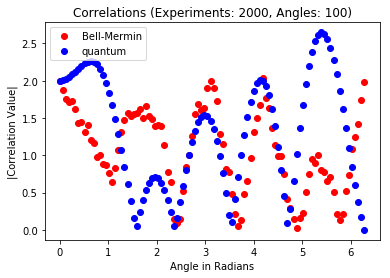

In [204]:
plt.xlabel('Angle in Radians')
plt.ylabel('|Correlation Value|')
plt.title(f'Correlations (Experiments: {number_of_experiments}, Angles: {angle_divisions})')
plt.plot(x_axis,np.abs(y_axis_classical),'ro')
plt.plot(x_axis,np.abs(y_axis_quantum),'bo')
plt.legend(["Bell-Mermin", "quantum"])